In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def like_l(q):
    return np.exp(-q*q)
def log_like(q):
    return -q*q
def gradient_loglike(u):
    return -2*u
def leapfrog(q,p,delta_t=1E-3,n_iter=5):
    q_new=q
    p_new=p
    for i in range (n_iter):
        p_new = p_new + 0.5*delta_t*gradient_loglike(q_new)
        q_new = q_new + delta_t * p_new
        p_new = p_new + 0.5*delta_t*gradient_loglike(q_new)
    return q_new, p_new

def Ham(q,p):
    K = p*p/2
    U = -log_like(q)
    return K+U


    
    

In [32]:
def MCMC(n_steps):
    q = np.zeros(n_steps)
    p = np.zeros(n_steps)
    
    q[0] = np.random.normal(0,1)
    p[0] = np.random.normal(0,1)
    for i in range (1,n_steps):
        p[i] = np.random.normal(0,1)
        q_new, p_new = leapfrog( q[i-1], p[i-1])
        E_new = Ham(q_new,p_new)
        E_old = Ham(q[i-1],p[i-1])
        alpha = min (1.0,np.exp(E_old - E_new))
        beta = np.random.random()
        if beta < alpha:
            q[i] = q_new
        else:
            q[i] = q[i-1]
        
    return q
        

In [37]:
q_chain = MCMC(10000)

(array([  459.,   606.,  1240.,  1793.,  1816.,  1207.,  1223.,  1083.,
         424.,   149.]),
 array([ 0.96520504,  1.04450476,  1.12380447,  1.20310419,  1.28240391,
        1.36170363,  1.44100334,  1.52030306,  1.59960278,  1.6789025 ,
        1.75820221]),
 <a list of 10 Patch objects>)

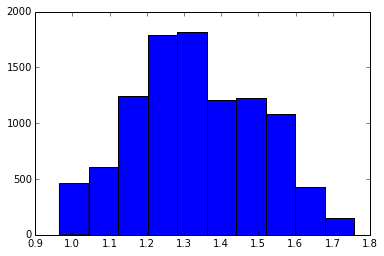

In [38]:
plt.hist(q_chain)